### Exercise 3
February 2020

### By: Ethan Tenison

In [1]:
# the usual suspects...
import sys                             # system module 
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd # data package, redundant since already did # graphics package
 
import matplotlib.pyplot as plt      # graphics package
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use
 
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-darkgrid')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### 1st, the data:

The following data were collected as part of an actual economic experiment, in which a sample of US family heads were presented with a price for regularly produced apples (***regprc***) and a price for hypothetical "ecologically friendly" (or "ecolabeled") apples (***ecoprc***), and asked how many pounds of the ecolabeled (***ecolbs***) and regular (***reglbs***) apples they would purchase. These data were used in the doctoral dissertation of Jeffrey Blend, Department of Agricultural Economics, Michigan State University, 1998. The thesis was supervised by Professor Eileen van Ravensway.  Drs. Blend and van Ravensway kindly provided the data to Jeffrey Wooldridge. The data are utilized in Prof. Wooldridge's econometrics textbook, *Introductory Econometrics* (various editions). The data were obtained from a telephone survey conducted by the Institute for Public Policy and Social Research at MSU.


### **Demand Functions and Demand Curves**
Useful economic concepts that this data can be used to illustrate include:

- *What is a demand function?*

- *What is a demand curve?*

- *What variables do we need to include in a demand function?*


### *Let's read in this data set in Stata format using the Python pandas package*

In [2]:
apdf=pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/apple.dta')  # Pandas function to read in a Stata dataset to a Pandas dataframe
apdf.tail(10) 

,id,educ,date,state,regprc,ecoprc,inseason,hhsize,male,faminc,age,reglbs,ecolbs,numlt5,num5_17,num18_64,numgt64
650,13872,14,20298,IL,1.19,1.59,0,3,1,25,38,0.000000,3.000000,0,2,1,0
651,13875,15,20498,TX,1.19,1.59,0,2,0,15,52,0.000000,0.000000,0,0,1,1
652,13879,16,20998,TX,1.19,1.59,0,3,1,65,46,2.000000,0.000000,0,1,2,0
653,13884,16,20598,MN,0.59,0.79,0,4,0,130,45,10.000000,0.000000,0,2,2,0
654,13887,10,20498,PA,1.19,1.59,0,1,0,5,75,0.000000,0.000000,0,0,0,1
655,13892,14,20298,MD,0.59,0.59,0,5,0,65,37,1.333333,1.333333,1,2,2,0
656,13893,16,20398,OH,0.59,0.59,0,4,0,65,47,0.000000,2.000000,0,2,2,0
657,13908,16,20398,IN,0.89,1.09,0,2,0,75,51,1.000000,0.000000,0,0,2,0
658,13916,12,20298,NY,0.59,0.59,0,1,0,15,45,0.000000,2.666667,0,0,1,0
659,13921,18,20798,MA,1.19,1.39,0,3,1,25,24,2.000000,0.000000,0,0,3,0


In [3]:
apdf.shape

(660, 17)

#### *Some special features of this data!*
- ***it's from a survey, people didn't actually go out and buy apples at these prices***
 + *this is called "**stated preference**" data (vs. "**revealed preference**")*
  + *it may be less reliable than actual revealed purchasing behavior*
+ ***but it has some advantages when we think about the statistical problems we face in estimating a demand curve***
    - *the researchers randomly selected the apple prices they presented to their randomly selected households*
    - *can anyone think of any reasons this randomization might be useful?*


### Question 1.
All the questions in this exercise can be addressed using methods described in Jupyter notebooks we previously discussed in class. 

* Please report basic summary statistics for all numeric variables in this data set (number non-missing observations, mean, median, standard deviation, min, max)

#### Answer here:

In [4]:
apdf.describe()

,id,educ,regprc,ecoprc,inseason,hhsize,male,faminc,age,reglbs,ecolbs,numlt5,num5_17,num18_64,numgt64
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.00000,660.000000,660.000000,660.000000,660.000000
mean,11729.009091,14.381818,0.882730,1.081517,0.336364,2.940909,0.262121,53.409091,44.522727,1.282323,1.47399,0.286364,0.621212,1.804545,0.228788
std,1071.582702,2.274014,0.244469,0.295573,0.472823,1.526049,0.440122,35.741220,15.212539,2.909872,2.52578,0.643489,0.994143,1.005136,0.548765
min,10002.000000,8.000000,0.590000,0.590000,0.000000,1.000000,0.000000,5.000000,19.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,10800.500000,12.000000,0.590000,0.890000,0.000000,2.000000,0.000000,25.000000,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,11692.000000,14.000000,0.890000,1.090000,0.000000,3.000000,0.000000,45.000000,43.000000,0.000000,1.00000,0.000000,0.000000,2.000000,0.000000
75%,12600.250000,16.000000,1.190000,1.290000,1.000000,4.000000,1.000000,65.000000,53.000000,2.000000,2.00000,0.000000,1.000000,2.000000,0.000000
max,13921.000000,20.000000,1.190000,1.590000,1.000000,9.000000,1.000000,250.000000,88.000000,42.000000,42.00000,4.000000,6.000000,7.000000,3.000000


#### Question 2.

* Please create a scatter plot showing the relationship between the quantity of regular apples demanded and regular apple price. This time, use the Pandas plot method to create your graph. Economists like to put quantity on the x-axis, price on the y-axis. It's an arcane tradition going back to 19th century economist Alfred Marshall.

#### Answer here:

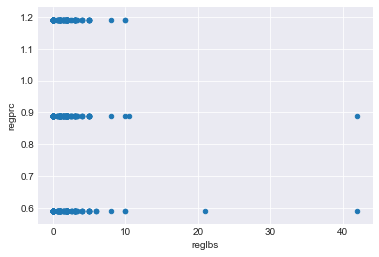

In [8]:
apdf.plot.scatter('reglbs', 'regprc')

### Question 3.

Please create a scatter plot showing the relationship between the quantity of ecolabelled apples demanded and ecolabelled apple price. For the moment, use the Pandas plot method.

#### Answer here:

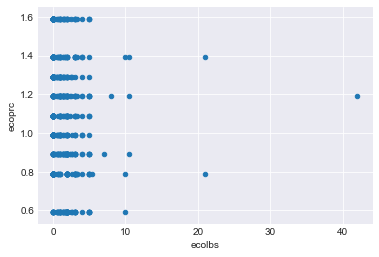

In [9]:
apdf.plot.scatter('ecolbs', 'ecoprc')

#### Question 4

One object-oriented alternative to make the last figure you just created is


Text(0.5, 0, 'apple quantity')

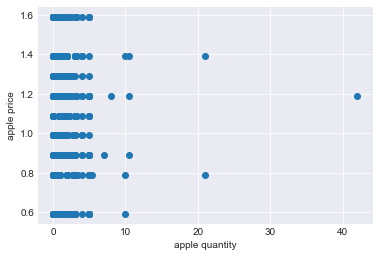

In [10]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf.ecolbs,apdf.ecoprc,ls='None',marker='o') # this line does the actual plotting; 
# we are using "dot notation" so as to not type lots of ''s and ['s
# ls is matplotlib-accepted abbreviation for "linestyle",otherwise would have to write out linestyle
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')

Actually, that improved it since I like these labels better than the plot method's default names (the variable names). The following code is equivalent.

Text(0.5, 0, 'apple quantity')

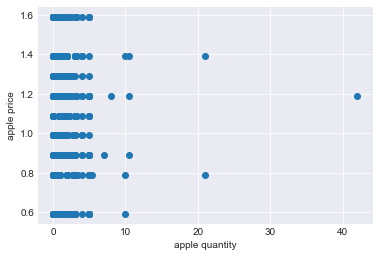

In [11]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf['ecolbs'],apdf['ecoprc'],linestyle='None',marker='o') # this line does the actual plotting; same but typing lots of ''s and ['s
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')

* Now, please use the object-oriented syntax to create an eco apple scatter plot where the brightness of the color indicates how many data points occupy the same coordinates.
    
    Hint: the matplotlib plot method has a parameter alpha which determines how transparent colors are. Try redoing this plot with the alpha parameter set to 20 percent. 

    To add this parameter, just type a comma after the y-variable followed by `alpha=.2`.
    
#### Answer here:

Text(0.5, 0, 'apple quantity')

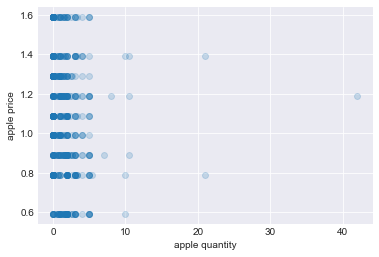

In [12]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf['ecolbs'],apdf['ecoprc'],linestyle='None',marker='o', alpha = 0.2) # this line does the actual plotting; same but typing lots of ''s and ['s
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')

### Question 5-- More advanced plots 

* Now, please create a scatter plot with both regular and ecolabelled apple quantities and prices occupying the same plot.
    * Hint: one easy way to do this is to use 2 ax.plot commands-- one for each pair of x,y variables. Be sure to leave alpha set equal to .2, to improve data visualization.
    
#### Answer here:

Text(0.5, 0, 'apple quantity')

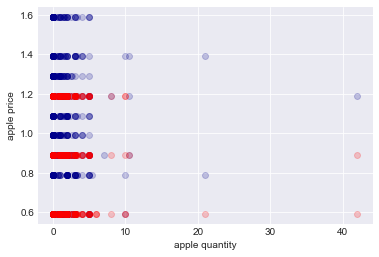

In [17]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf['ecolbs'],apdf['ecoprc'],linestyle='None',marker='o', alpha = 0.2, color = 'DarkBlue', label = 'Eco-labeled');ax.plot(apdf['reglbs'],apdf['regprc'],linestyle='None',marker='o', alpha = 0.2, color = 'Red', label = 'Regular-labeled'); # this line does the actual plotting; same but typing lots of ''s and ['s
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')

#### Question 6
It would be nice to have a legend linking marker color to whether the apple was ecolabelled or regular.
* Please add such a legend to the last figure.
    * Hint: `ax.legend()` with a list of strings for the names of the y-variables as the argument inside the parens will do the trick.
    
#### Answer here:

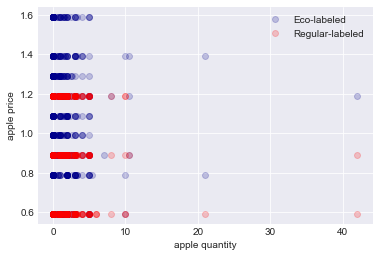

In [16]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf['ecolbs'],apdf['ecoprc'],linestyle='None',marker='o', alpha = 0.2, color = 'DarkBlue', label = 'Eco-labeled');ax.plot(apdf['reglbs'],apdf['regprc'],linestyle='None',marker='o', alpha = 0.2, color = 'Red', label = 'Regular-labeled'); # this line does the actual plotting; same but typing lots of ''s and ['s
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')
ax.legend()

#### Question 7
First, use help to get an extensive list of parameters you can set.

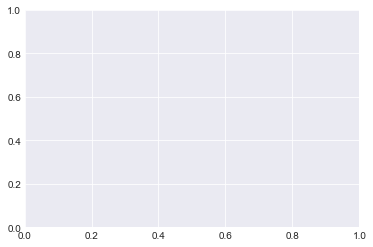

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 

In [18]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot?

* Using help and google, see if you can figure out how to, in addition,
    * change color of eco apples to green, regular to red
    * change shape of eco marker to a square
    * give the figure a title: "Sample Prices vs. Quantities for Ecolabelled and Regular Apples"
    
#### Answer here:

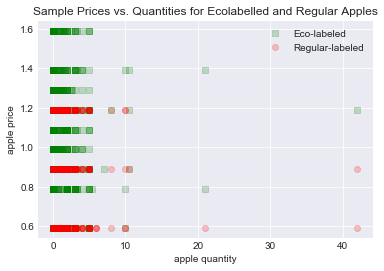

In [23]:
fig, ax=plt.subplots() # first line creates a blank figure and axis
ax.plot(apdf['ecolbs'],apdf['ecoprc'],linestyle='None',marker='s', alpha = 0.2, color = 'Green', label = 'Eco-labeled');ax.plot(apdf['reglbs'],apdf['regprc'],linestyle='None',marker='o', alpha = 0.2, color = 'Red', label = 'Regular-labeled'); # this line does the actual plotting; same but typing lots of ''s and ['s
ax.set_ylabel('apple price')
ax.set_xlabel('apple quantity')
ax.set_title('Sample Prices vs. Quantities for Ecolabelled and Regular Apples')
ax.legend()